## FASE 2 Q1-Q2: Analisis de Hipotesis

Este notebook desarrolla el analisis de las preguntas Q1 y Q2 sobre mortalidad infantil en Guatemala usando el periodo 2009-2022.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion visual base para analisis y graficas
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.dpi"] = 120

# Cargar datasets clean generados en prefase
nacimientos_clean = pd.read_csv("../data/processed/nacimientos_clean_2009_2022.csv")
defunciones_clean = pd.read_csv("../data/processed/defunciones_clean_2009_2022.csv")
control_calidad = pd.read_csv("../data/processed/q1q2_control_calidad_2009_2022.csv")

print("Librerias y datasets clean cargados correctamente")



C:\Users\RJBar\AppData\Local\Temp\ipykernel_16600\2055668156.py:12: DtypeWarning: Columns (0: ciuomad, 1: ciuopad) have mixed types. Specify dtype option on import or set low_memory=False.
  nacimientos_clean = pd.read_csv("../data/processed/nacimientos_clean_2009_2022.csv")


Librerias y datasets clean cargados correctamente


C:\Users\RJBar\AppData\Local\Temp\ipykernel_16600\2055668156.py:13: DtypeWarning: Columns (0: caudef.descrip, 1: ciuodif, 2: mnadif) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv("../data/processed/defunciones_clean_2009_2022.csv")


In [2]:
print("=== Verificacion inicial de prefase ===")
print(f"Nacimientos clean: {nacimientos_clean.shape}")
print(f"Defunciones clean: {defunciones_clean.shape}")

years_n = sorted(nacimientos_clean["año"].dropna().astype(int).unique())
years_d = sorted(defunciones_clean["año"].dropna().astype(int).unique())

print(f"Años en nacimientos: {years_n[0]}-{years_n[-1]} (n={len(years_n)})")
print(f"Años en defunciones: {years_d[0]}-{years_d[-1]} (n={len(years_d)})")

req_n = ["año", "depreg"]
req_d = ["año", "depreg", "edadif"]

print("\nColumnas clave en nacimientos:")
for c in req_n:
    estado = "OK" if c in nacimientos_clean.columns else "FALTA"
    print(f"  {c}: {estado}")

print("\nColumnas clave en defunciones:")
for c in req_d:
    estado = "OK" if c in defunciones_clean.columns else "FALTA"
    print(f"  {c}: {estado}")

print("\nControl de calidad (resumen):")
display(control_calidad[control_calidad["section"] == "summary"])


=== Verificacion inicial de prefase ===
Nacimientos clean: (5195195, 53)
Defunciones clean: (1167602, 32)
Años en nacimientos: 2009-2022 (n=14)
Años en defunciones: 2009-2022 (n=14)

Columnas clave en nacimientos:
  año: OK
  depreg: OK

Columnas clave en defunciones:
  año: OK
  depreg: OK
  edadif: OK

Control de calidad (resumen):


,section,tipo,year,metric,value
0,summary,nacimientos,NaN,files_considered,14
1,summary,nacimientos,NaN,rows_input,5195195
2,summary,nacimientos,NaN,rows_output,5195195
3,summary,nacimientos,NaN,rows_excluded_missing_depreg,0
4,summary,nacimientos,NaN,duplicates_exact,3472
5,summary,nacimientos,NaN,duplicates_operational,5190465
26,summary,defunciones,NaN,files_considered,14
27,summary,defunciones,NaN,rows_input,1167602
28,summary,defunciones,NaN,rows_output,1167602
29,summary,defunciones,NaN,rows_excluded_missing_depreg,0


## Fuente y alcance de datos

- Fuente: Estadisticas Vitales del INE.
- Periodo analizado para Q1-Q2: 2009-2022.
- Datasets de trabajo: `nacimientos_clean_2009_2022.csv` y `defunciones_clean_2009_2022.csv`.


## Q1: ¿Ha mejorado la mortalidad infantil en Guatemala entre 2009-2022?
**Hipotesis inicial**: Esperamos que la mortalidad infantil haya disminuido por mejoras economicas y de salud publica.


,año,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000,tendencia,estado_analisis,nota_metodologica
0,2009,351628,2,0.005688,0.070219,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
1,2010,361906,175,0.483551,0.197252,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
2,2011,373692,123,0.329148,0.324284,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
3,2012,388613,129,0.331950,0.451317,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
4,2013,387342,76,0.196209,0.578349,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
5,2014,386195,115,0.297777,0.705381,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
6,2015,391425,262,0.669349,0.832414,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
7,2016,390382,421,1.078431,0.959446,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
8,2017,381664,671,1.758091,1.086478,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...
9,2018,383263,634,1.654217,1.213511,analisis_principal,Serie anual 2009-2022 basada en fuente oficial...


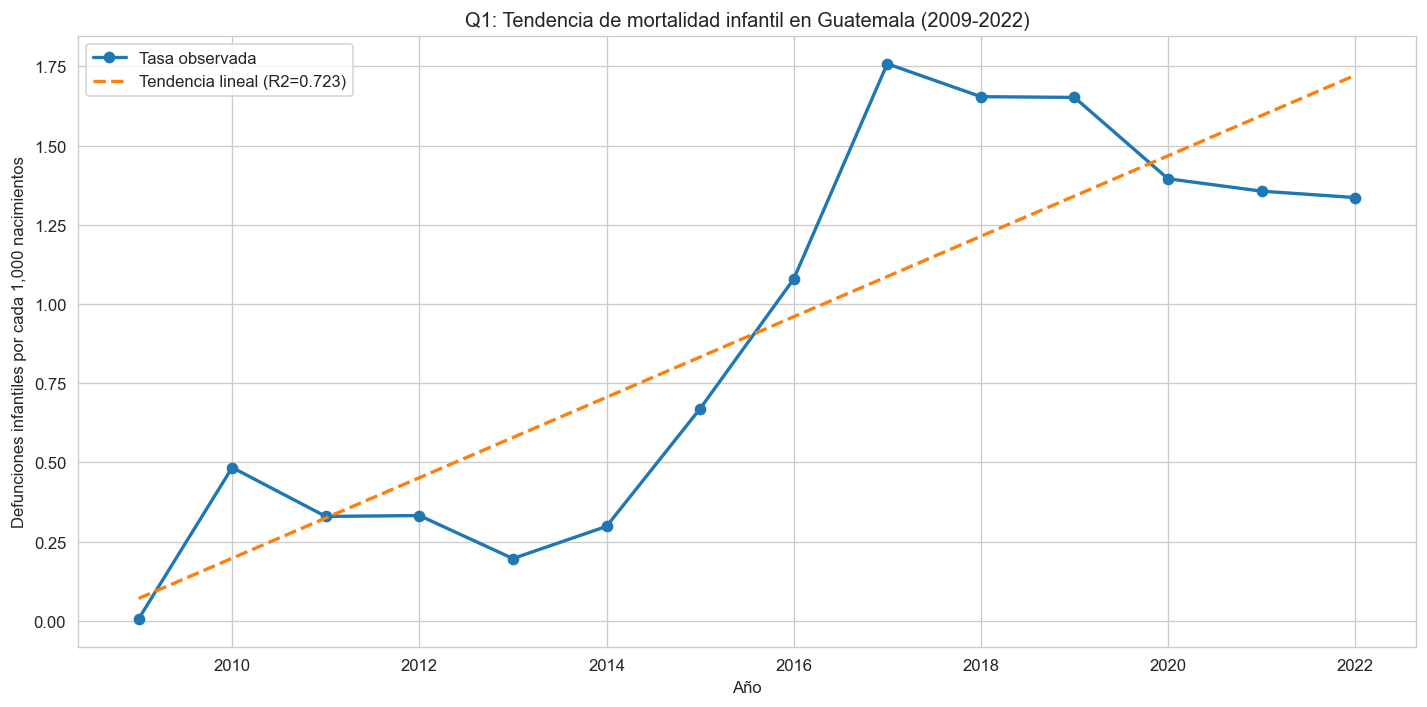

In [3]:
# Q1: Analisis de tendencia anual de mortalidad infantil (2009-2022)
nacimientos_anuales = nacimientos_clean.groupby("año").size().rename("nacimientos")
defunciones_infantiles_anuales = (
    defunciones_clean[defunciones_clean["edadif"] < 1]
    .groupby("año")
    .size()
    .rename("defunciones_infantiles")
)

q1_analisis = pd.concat([nacimientos_anuales, defunciones_infantiles_anuales], axis=1).fillna(0)
q1_analisis["defunciones_infantiles"] = q1_analisis["defunciones_infantiles"].astype(int)
q1_analisis["tasa_mortalidad_infantil_x1000"] = (
    q1_analisis["defunciones_infantiles"] / q1_analisis["nacimientos"]
) * 1000
q1_analisis = q1_analisis.reset_index().sort_values("año")

# Tendencia lineal simple
x = q1_analisis["año"].to_numpy(dtype=float)
y = q1_analisis["tasa_mortalidad_infantil_x1000"].to_numpy(dtype=float)
slope, intercept = np.polyfit(x, y, 1)
q1_analisis["tendencia"] = (x * slope) + intercept
y_pred = q1_analisis["tendencia"].to_numpy(dtype=float)
ss_res = float(np.sum((y - y_pred) ** 2))
ss_tot = float(np.sum((y - np.mean(y)) ** 2))
r2 = 1.0 - (ss_res / ss_tot) if ss_tot != 0 else 0.0

# Metadatos del analisis
q1_analisis["estado_analisis"] = "analisis_principal"
q1_analisis["nota_metodologica"] = "Serie anual 2009-2022 basada en fuente oficial del INE"

# Tabla final para reporte
q1_analisis.to_csv("../output/tables/q1_mortalidad_infantil_anual_2009_2022.csv", index=False)
display(q1_analisis)

# Visualizacion
plt.figure(figsize=(12, 6))
plt.plot(
    q1_analisis["año"],
    q1_analisis["tasa_mortalidad_infantil_x1000"],
    marker="o",
    linewidth=2,
    label="Tasa observada",
)
plt.plot(
    q1_analisis["año"],
    q1_analisis["tendencia"],
    linestyle="--",
    linewidth=2,
    label=f"Tendencia lineal (R2={r2:.3f})",
)
plt.title("Q1: Tendencia de mortalidad infantil en Guatemala (2009-2022)")
plt.xlabel("Año")
plt.ylabel("Defunciones infantiles por cada 1,000 nacimientos")
plt.legend()
plt.tight_layout()
plt.savefig("../output/figures/q1_tendencia_mortalidad_infantil_2009_2022.png", dpi=300)
plt.show()



### Cierre Q1

**Decision:** la hipotesis de mejora sostenida de la mortalidad infantil entre 2009 y 2022 se **rechaza**.

**Justificacion del resultado:**
1. La serie anual muestra un incremento marcado de la tasa desde 2015 hasta un pico en 2017-2019.
2. Aunque hay descenso leve despues de 2019, los valores de 2020-2022 se mantienen por encima de los primeros anios de la serie.
3. La tendencia lineal global es positiva y el ajuste (`R2`) muestra una señal temporal consistente para esta pregunta.

**Interpretacion:** en el periodo estudiado no se observa una mejora sostenida; el comportamiento general sugiere deterioro relativo de la tasa de mortalidad infantil.


## Q2: ¿Existen disparidades geograficas significativas en mortalidad infantil?

**Definicion operacional**: `tasa = (defunciones_infantiles_edadif<1 / nacimientos) * 1000`

**Alcance**:
1. Geografia: `depreg` (codigos 1-22).
2. Periodo principal: `2009-2022`.
3. Sensibilidad: `2010-2022` para verificar robustez del patron.


In [4]:
# Q2: Disparidades geograficas por departamento (sin exports)
# Base principal: 2009-2022
nacimientos_q2 = nacimientos_clean.copy()
defunciones_q2 = defunciones_clean.copy()

# Mapeo oficial de departamentos de Guatemala (1-22)
depreg_to_nombre = {
    1: "Guatemala",
    2: "El Progreso",
    3: "Sacatepequez",
    4: "Chimaltenango",
    5: "Escuintla",
    6: "Santa Rosa",
    7: "Solola",
    8: "Totonicapan",
    9: "Quetzaltenango",
    10: "Suchitepequez",
    11: "Retalhuleu",
    12: "San Marcos",
    13: "Huehuetenango",
    14: "Quiche",
    15: "Baja Verapaz",
    16: "Alta Verapaz",
    17: "Peten",
    18: "Izabal",
    19: "Zacapa",
    20: "Chiquimula",
    21: "Jalapa",
    22: "Jutiapa",
}

def format_dep_label(code: int) -> str:
    dep_name = depreg_to_nombre.get(int(code), "Desconocido")
    return f"{int(code):02d} - {dep_name}"

nacimientos_q2["año"] = pd.to_numeric(nacimientos_q2["año"], errors="coerce")
defunciones_q2["año"] = pd.to_numeric(defunciones_q2["año"], errors="coerce")
nacimientos_q2["depreg"] = pd.to_numeric(nacimientos_q2["depreg"], errors="coerce")
defunciones_q2["depreg"] = pd.to_numeric(defunciones_q2["depreg"], errors="coerce")
defunciones_q2["edadif"] = pd.to_numeric(defunciones_q2["edadif"], errors="coerce")

nacimientos_q2 = nacimientos_q2[
    (nacimientos_q2["año"] >= 2009) & (nacimientos_q2["año"] <= 2022)
].copy()
defunciones_q2 = defunciones_q2[
    (defunciones_q2["año"] >= 2009) & (defunciones_q2["año"] <= 2022)
].copy()

nacimientos_q2["año"] = nacimientos_q2["año"].astype(int)
defunciones_q2["año"] = defunciones_q2["año"].astype(int)
nacimientos_q2["depreg"] = nacimientos_q2["depreg"].astype(int)
defunciones_q2["depreg"] = defunciones_q2["depreg"].astype(int)

nacimientos_dep_anual = (
    nacimientos_q2.groupby(["año", "depreg"]).size().rename("nacimientos").reset_index()
)
def_inf_dep_anual = (
    defunciones_q2[defunciones_q2["edadif"] < 1]
    .groupby(["año", "depreg"])
    .size()
    .rename("defunciones_infantiles")
    .reset_index()
)

q2_dep_anual = nacimientos_dep_anual.merge(
    def_inf_dep_anual,
    on=["año", "depreg"],
    how="left",
)
q2_dep_anual["defunciones_infantiles"] = q2_dep_anual["defunciones_infantiles"].fillna(0).astype(int)
q2_dep_anual["tasa_mortalidad_infantil_x1000"] = (
    q2_dep_anual["defunciones_infantiles"] / q2_dep_anual["nacimientos"]
) * 1000
q2_dep_anual["dep_nombre"] = q2_dep_anual["depreg"].map(depreg_to_nombre)
q2_dep_anual["dep_label"] = q2_dep_anual["depreg"].apply(format_dep_label)
q2_dep_anual = q2_dep_anual.sort_values(["año", "depreg"]).reset_index(drop=True)

q2_dep_periodo = (
    q2_dep_anual.groupby("depreg", as_index=False)[["nacimientos", "defunciones_infantiles"]]
    .sum()
)
q2_dep_periodo["tasa_mortalidad_infantil_x1000"] = (
    q2_dep_periodo["defunciones_infantiles"] / q2_dep_periodo["nacimientos"]
) * 1000
q2_dep_periodo["dep_nombre"] = q2_dep_periodo["depreg"].map(depreg_to_nombre)
q2_dep_periodo["dep_label"] = q2_dep_periodo["depreg"].apply(format_dep_label)
q2_dep_periodo = q2_dep_periodo.sort_values("tasa_mortalidad_infantil_x1000").reset_index(drop=True)

q2_dep_periodo_2010_2022 = (
    q2_dep_anual[q2_dep_anual["año"] >= 2010]
    .groupby("depreg", as_index=False)[["nacimientos", "defunciones_infantiles"]]
    .sum()
)
q2_dep_periodo_2010_2022["tasa_mortalidad_infantil_x1000"] = (
    q2_dep_periodo_2010_2022["defunciones_infantiles"]
    / q2_dep_periodo_2010_2022["nacimientos"]
) * 1000
q2_dep_periodo_2010_2022["dep_nombre"] = q2_dep_periodo_2010_2022["depreg"].map(depreg_to_nombre)
q2_dep_periodo_2010_2022["dep_label"] = q2_dep_periodo_2010_2022["depreg"].apply(format_dep_label)
q2_dep_periodo_2010_2022 = q2_dep_periodo_2010_2022.sort_values("tasa_mortalidad_infantil_x1000").reset_index(drop=True)

best3_2009_2022 = q2_dep_periodo.nsmallest(3, "tasa_mortalidad_infantil_x1000")
worst3_2009_2022 = q2_dep_periodo.nlargest(3, "tasa_mortalidad_infantil_x1000")

best3_2010_2022 = q2_dep_periodo_2010_2022.nsmallest(3, "tasa_mortalidad_infantil_x1000")
worst3_2010_2022 = q2_dep_periodo_2010_2022.nlargest(3, "tasa_mortalidad_infantil_x1000")

max_rate = float(q2_dep_periodo["tasa_mortalidad_infantil_x1000"].max())
min_rate = float(q2_dep_periodo["tasa_mortalidad_infantil_x1000"].min())
brecha_abs = max_rate - min_rate
brecha_ratio = (max_rate / min_rate) if min_rate != 0 else np.nan

print("=== Q2: Estructura esperada ===")
print(f"Filas q2_dep_anual: {len(q2_dep_anual)}")
print("Años unicos:", q2_dep_anual["año"].nunique())
print("Departamentos unicos:", q2_dep_anual["depreg"].nunique())
print("NaN en tasa:", q2_dep_anual["tasa_mortalidad_infantil_x1000"].isna().sum())

print("")
print("=== Top 3 menor tasa (2009-2022) ===")
display(best3_2009_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])

print("=== Top 3 mayor tasa (2009-2022) ===")
display(worst3_2009_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])

print("=== Brecha entre extremos (2009-2022) ===")
print(f"Brecha absoluta max-min: {brecha_abs:.4f}")
print(f"Razon max-min: {brecha_ratio:.4f}")

print("")
print("=== Sensibilidad 2010-2022: Top 3 menor tasa ===")
display(best3_2010_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])

print("=== Sensibilidad 2010-2022: Top 3 mayor tasa ===")
display(worst3_2010_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])


=== Q2: Estructura esperada ===
Filas q2_dep_anual: 308
Años unicos: 14
Departamentos unicos: 22
NaN en tasa: 0

=== Top 3 menor tasa (2009-2022) ===


,dep_label,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
0,19 - Zacapa,81417,14,0.171954
1,20 - Chiquimula,152031,27,0.177595
2,18 - Izabal,130344,31,0.237832


=== Top 3 mayor tasa (2009-2022) ===


,dep_label,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
21,01 - Guatemala,872734,1563,1.790924
20,16 - Alta Verapaz,471248,766,1.625471
19,03 - Sacatepequez,104307,108,1.035405


=== Brecha entre extremos (2009-2022) ===
Brecha absoluta max-min: 1.6190
Razon max-min: 10.4151

=== Sensibilidad 2010-2022: Top 3 menor tasa ===


,dep_label,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
0,19 - Zacapa,75806,14,0.184682
1,20 - Chiquimula,141825,27,0.190375
2,18 - Izabal,121436,31,0.255279


=== Sensibilidad 2010-2022: Top 3 mayor tasa ===


,dep_label,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
21,01 - Guatemala,813606,1563,1.921077
20,16 - Alta Verapaz,438246,765,1.745595
19,03 - Sacatepequez,97509,108,1.107590


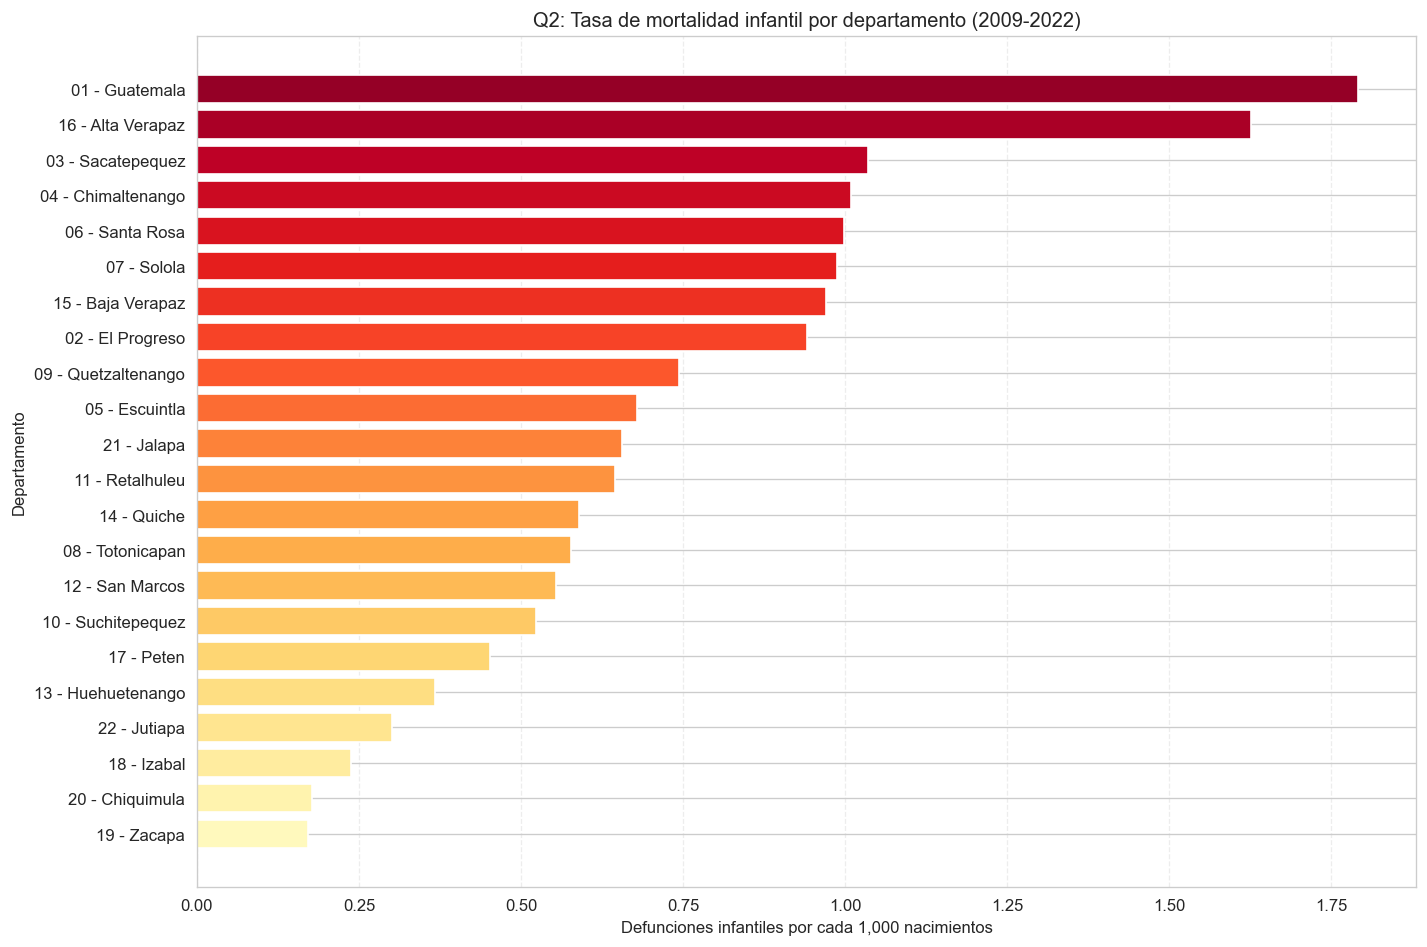

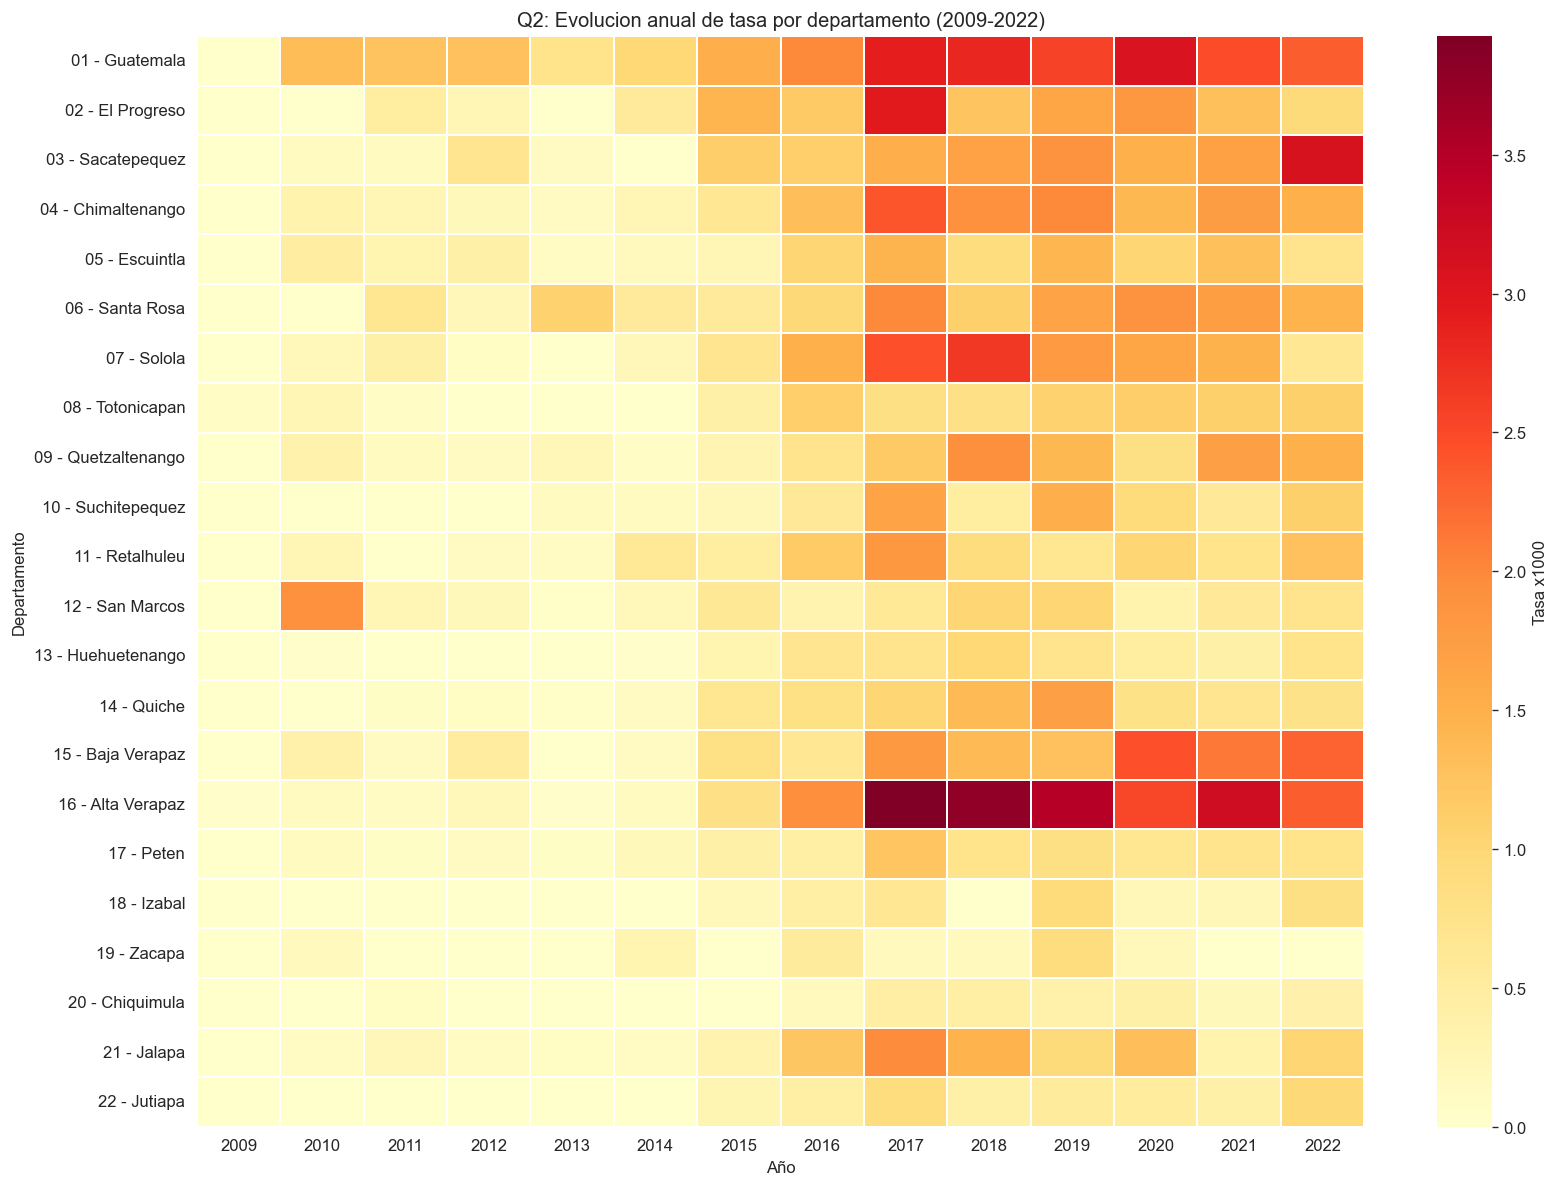

In [5]:
# Q2: Visualizacion en notebook (sin savefig)
import matplotlib.ticker as mticker

# Fallback de mapeo por si la celda previa no se ejecuto en el kernel actual
depreg_to_nombre_local = {
    1: "Guatemala",
    2: "El Progreso",
    3: "Sacatepequez",
    4: "Chimaltenango",
    5: "Escuintla",
    6: "Santa Rosa",
    7: "Solola",
    8: "Totonicapan",
    9: "Quetzaltenango",
    10: "Suchitepequez",
    11: "Retalhuleu",
    12: "San Marcos",
    13: "Huehuetenango",
    14: "Quiche",
    15: "Baja Verapaz",
    16: "Alta Verapaz",
    17: "Peten",
    18: "Izabal",
    19: "Zacapa",
    20: "Chiquimula",
    21: "Jalapa",
    22: "Jutiapa",
}

def format_dep_label_local(code: int) -> str:
    dep_name = depreg_to_nombre_local.get(int(code), "Desconocido")
    return f"{int(code):02d} - {dep_name}"

q2_plot = q2_dep_periodo.copy().sort_values("tasa_mortalidad_infantil_x1000", ascending=True)
if "dep_label" not in q2_plot.columns:
    q2_plot["dep_label"] = q2_plot["depreg"].astype(int).apply(format_dep_label_local)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("YlOrRd", n_colors=len(q2_plot))
plt.barh(
    q2_plot["dep_label"],
    q2_plot["tasa_mortalidad_infantil_x1000"],
    color=colors,
)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))
ax.grid(axis="x", linestyle="--", alpha=0.35)
plt.title("Q2: Tasa de mortalidad infantil por departamento (2009-2022)")
plt.xlabel("Defunciones infantiles por cada 1,000 nacimientos")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()

heatmap_source = q2_dep_anual.copy()
if "dep_label" not in heatmap_source.columns:
    heatmap_source["dep_label"] = heatmap_source["depreg"].astype(int).apply(format_dep_label_local)

dep_order = [format_dep_label_local(dep) for dep in sorted(heatmap_source["depreg"].astype(int).unique())]

heatmap_data = heatmap_source.pivot(
    index="dep_label",
    columns="año",
    values="tasa_mortalidad_infantil_x1000",
).reindex(dep_order)

plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.25,
    linecolor="white",
    cbar_kws={"label": "Tasa x1000"},
)
plt.title("Q2: Evolucion anual de tasa por departamento (2009-2022)")
plt.xlabel("Año")
plt.ylabel("Departamento")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Cierre Q2

**Decision:** la hipótesis de disparidades geográficas en mortalidad infantil **se confirma en términos descriptivos** para 2009-2022.

**Hallazgos principales:**
1. Existe una brecha marcada entre departamentos:
   - Máxima tasa: **Guatemala** (`1.7909` por 1,000).
   - Mínima tasa: **Zacapa** (`0.1720` por 1,000).
   - Brecha absoluta: **1.6190** puntos por 1,000.
   - Razón máximo/mínimo: **10.42x**.
2. Departamentos con **menor tasa** (2009-2022):
   - Zacapa (`0.1720`)
   - Chiquimula (`0.1776`)
   - Izabal (`0.2378`)
3. Departamentos con **mayor tasa** (2009-2022):
   - Guatemala (`1.7909`)
   - Alta Verapaz (`1.6255`)
   - Sacatepéquez (`1.0354`)

**Patrón temporal (heatmap):**
- La intensidad de tasas aumenta en varios departamentos entre **2017 y 2021**.
- Destacan niveles altos persistentes en **Guatemala** y **Alta Verapaz** en ese tramo.

**Robustez del resultado:**
- Al repetir el análisis en **2010-2022**, se mantienen los mismos extremos:
  - Menores: Zacapa, Chiquimula, Izabal.
  - Mayores: Guatemala, Alta Verapaz, Sacatepéquez.
- Esto sugiere que la conclusión no depende solo del año 2009.

**Límite metodológico:**
- Este análisis es exploratorio y descriptivo; muestra diferencias observadas entre departamentos, pero **no establece causalidad**.


## Utilidades para Q3-Q5

Las siguientes celdas configuran rutas de salida y funciones auxiliares que se reutilizan en los análisis de Q3 a Q5.

In [6]:
# Utilidades compartidas para los análisis siguientes
from pathlib import Path

OUTPUT_TABLES = Path("../output/tables")
OUTPUT_FIGURES = Path("../output/figures")
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)
OUTPUT_FIGURES.mkdir(parents=True, exist_ok=True)

DEPREG_TO_NOMBRE = {
    1: "Guatemala",
    2: "El Progreso",
    3: "Sacatepéquez",
    4: "Chimaltenango",
    5: "Escuintla",
    6: "Santa Rosa",
    7: "Sololá",
    8: "Totonicapán",
    9: "Quetzaltenango",
    10: "Suchitepéquez",
    11: "Retalhuleu",
    12: "San Marcos",
    13: "Huehuetenango",
    14: "Quiché",
    15: "Baja Verapaz",
    16: "Alta Verapaz",
    17: "Petén",
    18: "Izabal",
    19: "Zacapa",
    20: "Chiquimula",
    21: "Jalapa",
    22: "Jutiapa",
}

MES_CANDIDATOS = ["mesocu", "mes", "mesreg", "mesdef", "mesnac", "mesocur"]

def detectar_columna_mes(df: pd.DataFrame, nombre_df: str) -> str:
    """Intenta localizar una columna que represente el mes en el DataFrame recibido."""
    for col in MES_CANDIDATOS:
        if col in df.columns:
            return col
    raise KeyError(
        f"No se identificó columna de mes en {nombre_df}; ajusta MES_CANDIDATOS con base en el diccionario de datos."
    )

def preparar_panel_departamental(nac_df: pd.DataFrame, def_df: pd.DataFrame) -> pd.DataFrame:
    """Genera un panel departamental anual con tasas por 1,000 nacimientos."""
    for col in ("año", "depreg"):
        if col not in nac_df.columns or col not in def_df.columns:
            raise KeyError(f"La columna obligatoria '{col}' no está presente en ambos datasets.")
    if "edadif" not in def_df.columns:
        raise KeyError("El dataset de defunciones necesita la columna 'edadif' para filtrar mortalidad infantil.")

    nac = nac_df.copy()
    defun = def_df.copy()

    for col in ("año", "depreg"):
        nac[col] = pd.to_numeric(nac[col], errors="coerce")
        defun[col] = pd.to_numeric(defun[col], errors="coerce")
    defun["edadif"] = pd.to_numeric(defun["edadif"], errors="coerce")

    nac = nac.dropna(subset=["año", "depreg"])
    defun = defun.dropna(subset=["año", "depreg", "edadif"])

    nac[["año", "depreg"]] = nac[["año", "depreg"]].astype(int)
    defun[["año", "depreg"]] = defun[["año", "depreg"]].astype(int)

    panel_nac = nac.groupby(["año", "depreg"]).size().rename("nacimientos").reset_index()
    panel_def = (
        defun[defun["edadif"] < 1]
        .groupby(["año", "depreg"])
        .size()
        .rename("defunciones_infantiles")
        .reset_index()
    )

    panel = panel_nac.merge(panel_def, on=["año", "depreg"], how="left")
    panel["defunciones_infantiles"] = panel["defunciones_infantiles"].fillna(0).astype(int)
    panel["tasa_mortalidad_infantil_x1000"] = (
        panel["defunciones_infantiles"] / panel["nacimientos"]
    ) * 1000
    panel["dep_nombre"] = panel["depreg"].map(DEPREG_TO_NOMBRE)
    return panel

# Garantiza que las estructuras departamentales estén disponibles aun si la celda de Q2 no se ejecutó en esta sesión
if "q2_dep_anual" not in globals():
    q2_dep_anual = preparar_panel_departamental(nacimientos_clean, defunciones_clean)

## Q3: Patrones temporales intraanuales de mortalidad infantil

Pregunta: ¿existen patrones estacionales (por mes y año) en la mortalidad infantil entre 2009 y 2022?

Enfoque: construir un panel mensual enlazando nacimientos y defunciones infantiles, calcular tasas por 1,000 nacimientos, identificar meses críticos por año y visualizar calor/estacionalidad.

,año,mes_num,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000,mes_nombre,participacion_defunciones_pct,ranking_mes_en_año
0,2009,1,30715,0,0.000000,Ene,0.0,3.0
1,2009,2,26078,0,0.000000,Feb,0.0,3.0
2,2009,3,29319,0,0.000000,Mar,0.0,3.0
3,2009,4,27917,0,0.000000,Abr,0.0,3.0
4,2009,5,29363,1,0.034056,May,50.0,1.0
5,2009,6,27988,0,0.000000,Jun,0.0,3.0
6,2009,7,29476,1,0.033926,Jul,50.0,2.0
7,2009,8,30354,0,0.000000,Ago,0.0,3.0
8,2009,9,31590,0,0.000000,Sep,0.0,3.0
9,2009,10,30505,0,0.000000,Oct,0.0,3.0


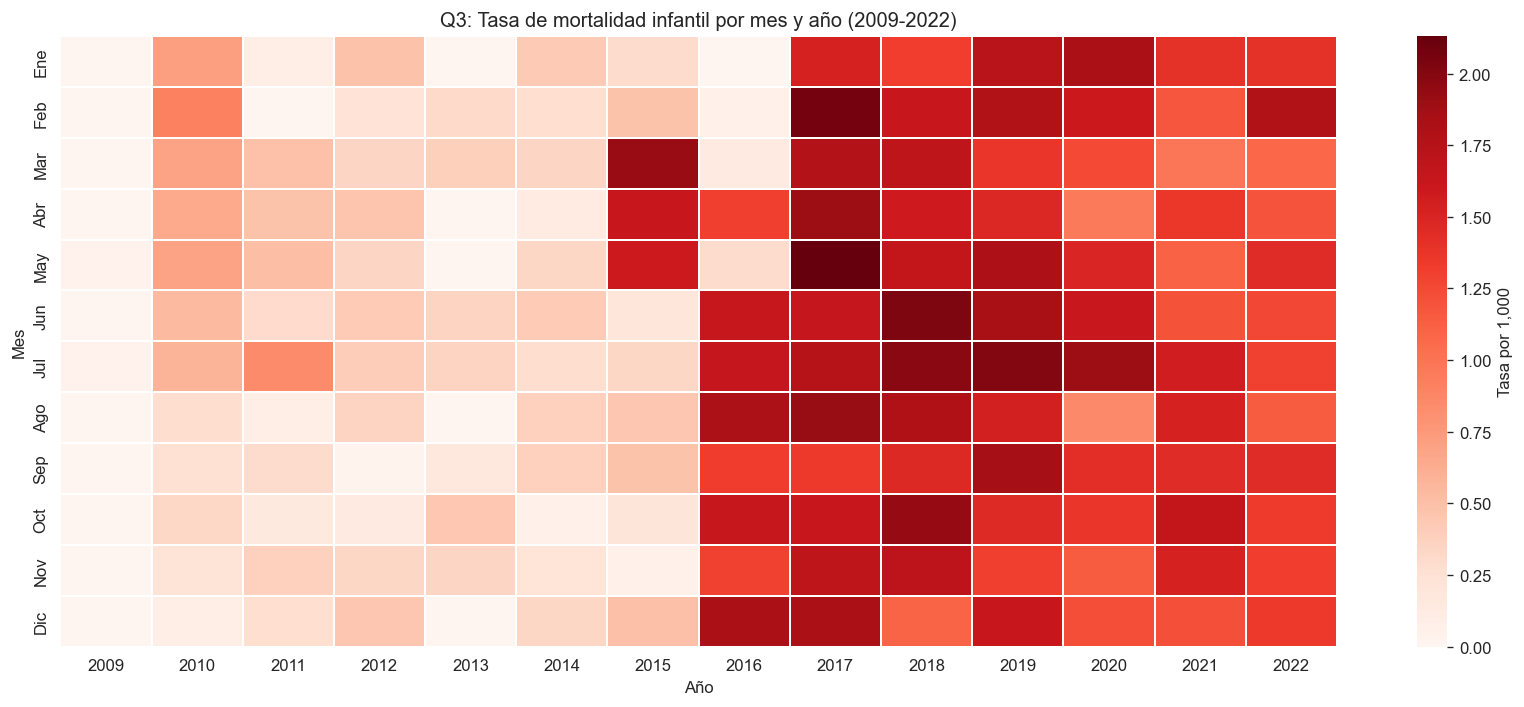

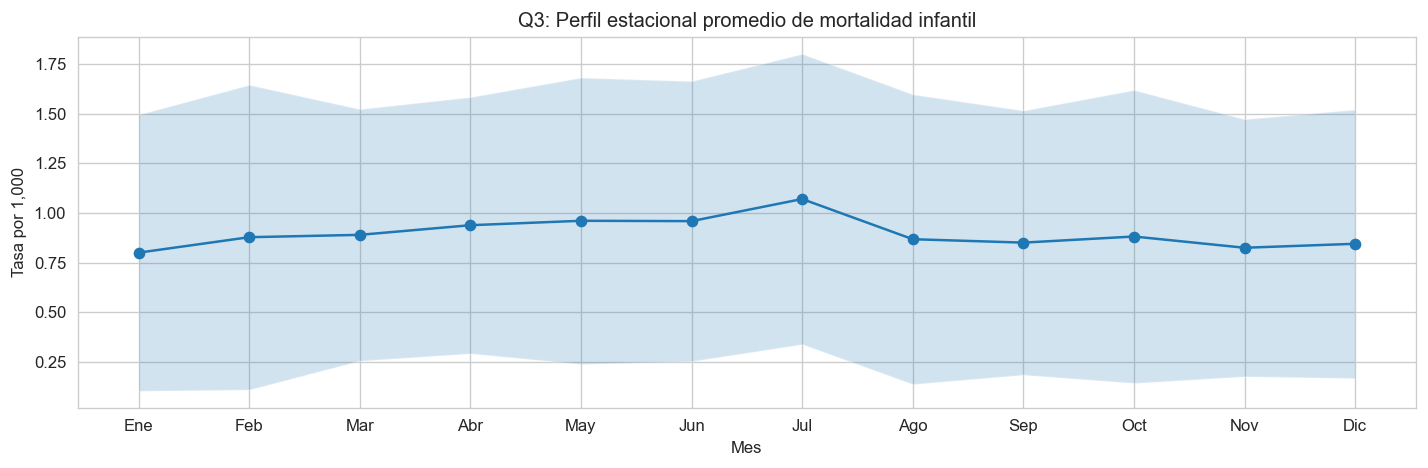

,mes_num,mes_nombre,tasa_promedio,tasa_std,defunciones_promedio,coef_variacion
0,1,Ene,0.800559,0.696316,24.642857,0.869786
1,2,Feb,0.878443,0.768092,24.000000,0.874379
2,3,Mar,0.890350,0.634199,27.357143,0.712303
3,4,Abr,0.938912,0.646073,27.928571,0.688108
4,5,May,0.961233,0.721741,29.500000,0.750850
5,6,Jun,0.959482,0.705892,28.714286,0.735701
6,7,Jul,1.070938,0.731653,33.214286,0.683189
7,8,Ago,0.868390,0.730286,27.642857,0.840965
8,9,Sep,0.851183,0.665781,28.000000,0.782183
9,10,Oct,0.882001,0.738439,28.428571,0.837232


In [7]:
# Q3: Panel mensual y métricas estacionales
MESES_LABEL = {
    1: "Ene", 2: "Feb", 3: "Mar", 4: "Abr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dic"
}

mes_def_col = detectar_columna_mes(defunciones_clean, "defunciones_clean")
mes_nac_col = detectar_columna_mes(nacimientos_clean, "nacimientos_clean")

defunciones_mensual = defunciones_clean.copy()
defunciones_mensual["año"] = pd.to_numeric(defunciones_mensual["año"], errors="coerce")
defunciones_mensual[mes_def_col] = pd.to_numeric(defunciones_mensual[mes_def_col], errors="coerce")
defunciones_mensual["edadif"] = pd.to_numeric(defunciones_mensual["edadif"], errors="coerce")
defunciones_mensual = defunciones_mensual.dropna(subset=["año", mes_def_col, "edadif"])
defunciones_mensual = defunciones_mensual[defunciones_mensual["edadif"] < 1]
defunciones_mensual[["año", mes_def_col]] = defunciones_mensual[["año", mes_def_col]].astype(int)

nacimientos_mensual = nacimientos_clean.copy()
nacimientos_mensual["año"] = pd.to_numeric(nacimientos_mensual["año"], errors="coerce")
nacimientos_mensual[mes_nac_col] = pd.to_numeric(nacimientos_mensual[mes_nac_col], errors="coerce")
nacimientos_mensual = nacimientos_mensual.dropna(subset=["año", mes_nac_col])
nacimientos_mensual[["año", mes_nac_col]] = nacimientos_mensual[["año", mes_nac_col]].astype(int)

panel_nac_mensual = (
    nacimientos_mensual.groupby(["año", mes_nac_col]).size().rename("nacimientos").reset_index()
    .rename(columns={mes_nac_col: "mes_num"})
)
panel_def_mensual = (
    defunciones_mensual.groupby(["año", mes_def_col]).size().rename("defunciones_infantiles").reset_index()
    .rename(columns={mes_def_col: "mes_num"})
)

panel_mensual = panel_nac_mensual.merge(
    panel_def_mensual,
    on=["año", "mes_num"],
    how="left",
)
panel_mensual["defunciones_infantiles"] = panel_mensual["defunciones_infantiles"].fillna(0).astype(int)
panel_mensual["tasa_mortalidad_infantil_x1000"] = np.where(
    panel_mensual["nacimientos"] > 0,
    (panel_mensual["defunciones_infantiles"] / panel_mensual["nacimientos"]) * 1000,
    np.nan
)
panel_mensual["mes_nombre"] = panel_mensual["mes_num"].map(MESES_LABEL)
panel_mensual = panel_mensual.dropna(subset=["mes_nombre"]).sort_values(["año", "mes_num"]).reset_index(drop=True)

totales_anuales = panel_mensual.groupby("año")["defunciones_infantiles"].transform("sum")
panel_mensual["participacion_defunciones_pct"] = np.where(
    totales_anuales > 0,
    (panel_mensual["defunciones_infantiles"] / totales_anuales) * 100,
    0
)
panel_mensual["ranking_mes_en_año"] = panel_mensual.groupby("año")["tasa_mortalidad_infantil_x1000"].rank(
    method="dense",
    ascending=False
)

panel_mensual.to_csv(OUTPUT_TABLES / "q3_mortalidad_infantil_mensual_2009_2022.csv", index=False)
display(panel_mensual.head(12))

heatmap_data = panel_mensual.pivot_table(
    index="mes_nombre",
    columns="año",
    values="tasa_mortalidad_infantil_x1000",
    aggfunc="mean"
)
heatmap_data = heatmap_data.reindex([MESES_LABEL[m] for m in sorted(MESES_LABEL.keys())])

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap="Reds",
    linewidths=0.2,
    linecolor="white",
    cbar_kws={"label": "Tasa por 1,000"}
)
plt.title("Q3: Tasa de mortalidad infantil por mes y año (2009-2022)")
plt.xlabel("Año")
plt.ylabel("Mes")
plt.tight_layout()
plt.savefig(OUTPUT_FIGURES / "q3_heatmap_tasa_mensual.png", dpi=300)
plt.show()

resumen_meses = (
    panel_mensual.groupby(["mes_num", "mes_nombre"]).agg(
        tasa_promedio=("tasa_mortalidad_infantil_x1000", "mean"),
        tasa_std=("tasa_mortalidad_infantil_x1000", "std"),
        defunciones_promedio=("defunciones_infantiles", "mean")
    )
    .reset_index()
    .sort_values("mes_num")
)
resumen_meses["coef_variacion"] = resumen_meses["tasa_std"] / resumen_meses["tasa_promedio"]
resumen_meses.to_csv(OUTPUT_TABLES / "q3_resumen_estacional.csv", index=False)

plt.figure(figsize=(12, 4))
plt.plot(resumen_meses["mes_nombre"], resumen_meses["tasa_promedio"], marker="o")
plt.fill_between(
    resumen_meses["mes_nombre"],
    resumen_meses["tasa_promedio"] - resumen_meses["tasa_std"].fillna(0),
    resumen_meses["tasa_promedio"] + resumen_meses["tasa_std"].fillna(0),
    alpha=0.2
 )
plt.title("Q3: Perfil estacional promedio de mortalidad infantil")
plt.xlabel("Mes")
plt.ylabel("Tasa por 1,000")
plt.tight_layout()
plt.savefig(OUTPUT_FIGURES / "q3_tendencia_estacional.png", dpi=300)
plt.show()

display(resumen_meses)

### Cierre Q3

- **Salidas clave:** `q3_mortalidad_infantil_mensual_2009_2022.csv`, `q3_resumen_estacional.csv`, `q3_heatmap_tasa_mensual.png` y `q3_tendencia_estacional.png`.
- **Cómo interpretar:** el heatmap expone meses críticos por año, mientras que la serie promedio resume la estacionalidad medianizada.
- **Siguiente paso analítico:** contrastar meses con máximos repetidos contra choques coyunturales (p.ej. crisis sanitaria o climática) apoyándose en la columna `ranking_mes_en_año`.

## Q4: Variación de la mortalidad infantil según características demográficas

Pregunta: ¿qué tan diferentes son las tasas por 1,000 nacimientos cuando se segmenta por rasgos demográficos disponibles (sexo, asistencia, área, etc.)?

Estrategia: identificar columnas categóricas compartidas entre nacimientos y defunciones, calcular tasas y participaciones por categoría y generar visualizaciones para las dimensiones con mayor cobertura.

In [8]:
# Q4: Tasas por variables demográficas compartidas
infantil_df = defunciones_clean.copy()
infantil_df["edadif"] = pd.to_numeric(infantil_df["edadif"], errors="coerce")
infantil_df = infantil_df.dropna(subset=["edadif"])
infantil_df = infantil_df[infantil_df["edadif"] < 1]

excluir_cols = {
    "año",
    "depreg",
    "mupreg",
    "edadif",
    "folio",
    "folioe",
    "pagina",
    "id",
    "id_registro",
    "domreg",
}

candidatas = sorted(
    (set(nacimientos_clean.columns) & set(defunciones_clean.columns)) - excluir_cols
)

resumenes_demograficos: list[pd.DataFrame] = []
plots_generados = 0
MAX_PLOTS = 6

for col in candidatas:
    nunique = nacimientos_clean[col].nunique(dropna=True)
    if nunique < 2 or nunique > 15:
        continue

    nac_group = nacimientos_clean.groupby(col).size().rename("nacimientos")
    def_group = infantil_df.groupby(col).size().rename("defunciones_infantiles")
    merged = pd.concat([nac_group, def_group], axis=1).fillna(0).reset_index().rename(columns={col: "categoria"})
    total_nac = merged["nacimientos"].sum()
    total_def = merged["defunciones_infantiles"].sum()
    merged["categoria"] = merged["categoria"].astype(str).replace({"": "Sin dato"})
    merged["variable"] = col
    merged["tasa_mortalidad_infantil_x1000"] = np.where(
        merged["nacimientos"] > 0,
        (merged["defunciones_infantiles"] / merged["nacimientos"]) * 1000,
        np.nan
    )
    merged["pct_nacimientos"] = np.where(total_nac > 0, (merged["nacimientos"] / total_nac) * 100, 0)
    merged["pct_defunciones"] = np.where(total_def > 0, (merged["defunciones_infantiles"] / total_def) * 100, 0)
    resumenes_demograficos.append(merged)

    if plots_generados < MAX_PLOTS:
        top_plot = merged.sort_values("nacimientos", ascending=False).head(8)
        plt.figure(figsize=(10, 5))
        sns.barplot(
            data=top_plot,
            x="tasa_mortalidad_infantil_x1000",
            y="categoria",
            palette="viridis"
        )
        plt.title(f"Q4: Tasa por 1,000 según {col}")
        plt.xlabel("Tasa por 1,000 nacimientos")
        plt.ylabel("Categoría")
        plt.tight_layout()
        fig_path = OUTPUT_FIGURES / f"q4_{col}_tasas.png"
        plt.savefig(fig_path, dpi=250)
        plt.close()
        plots_generados += 1

if resumenes_demograficos:
    q4_resultados = pd.concat(resumenes_demograficos, ignore_index=True)
    q4_resultados.to_csv(OUTPUT_TABLES / "q4_tasas_demograficas.csv", index=False)
    display(q4_resultados.head(30))
else:
    print("No se encontraron columnas categóricas compartidas con cardinalidad manejable.")

C:\Users\RJBar\AppData\Local\Temp\ipykernel_16600\2287914200.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\RJBar\AppData\Local\Temp\ipykernel_16600\2287914200.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\RJBar\AppData\Local\Temp\ipykernel_16600\2287914200.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\RJBar\AppData\Local\Temp\ipykernel_16600\2287914200.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

,categoria,nacimientos,defunciones_infantiles,variable,tasa_mortalidad_infantil_x1000,pct_nacimientos,pct_defunciones
0,1.0,612057,1726,areag,2.819999,56.295287,87.436677
1,2.0,457109,227,areag,0.496599,42.043605,11.499493
2,9.0,18060,21,areag,1.162791,1.661108,1.063830
3,9.0,351628,2,añoocu,0.005688,8.718673,0.046512
4,2010.0,361906,175,añoocu,0.483551,8.973518,4.069767
5,2011.0,373692,123,añoocu,0.329148,9.265753,2.860465
6,2015.0,391425,262,añoocu,0.669349,9.705446,6.093023
7,2016.0,390382,421,añoocu,1.078431,9.679585,9.790698
8,2017.0,381664,671,añoocu,1.758091,9.463420,15.604651
9,2018.0,383263,634,añoocu,1.654217,9.503068,14.744186


### Cierre Q4

- **Productos:** tabla consolidada `q4_tasas_demograficas.csv` y hasta seis gráficos `q4_<variable>_tasas.png`.
- **Lectura recomendada:** priorizar variables con mayor brecha entre `pct_defunciones` y `pct_nacimientos` para detectar sobre-representación de riesgo.
- **Próximo paso:** contrastar segmentos críticos con contexto territorial (p.ej. cruzar sexo × departamento) antes de pasar al clustering.

## Q5: Clustering de departamentos según perfiles de mortalidad infantil

Hipótesis: es posible agrupar departamentos en segmentos homogéneos considerando nivel, tendencia y volatilidad de la tasa entre 2009 y 2022.

Metodología: construir un set de características por departamento, escalarlo, evaluar k=2..5 con `KMeans` + silueta, elegir el mejor k y generar tablas/figuras interpretables.

,k,silhouette
0,2,0.469038
1,3,0.341639
2,4,0.336862
3,5,0.313121


,cluster,departamentos,media_tasa,tasa_ultima,pendiente_tendencia,std_tasa,cluster_label
0,0,18,0.595495,0.908874,0.090394,0.513272,Baja tasa estable
1,1,4,1.368023,2.515340,0.220608,1.034067,Intermedia con oscilación


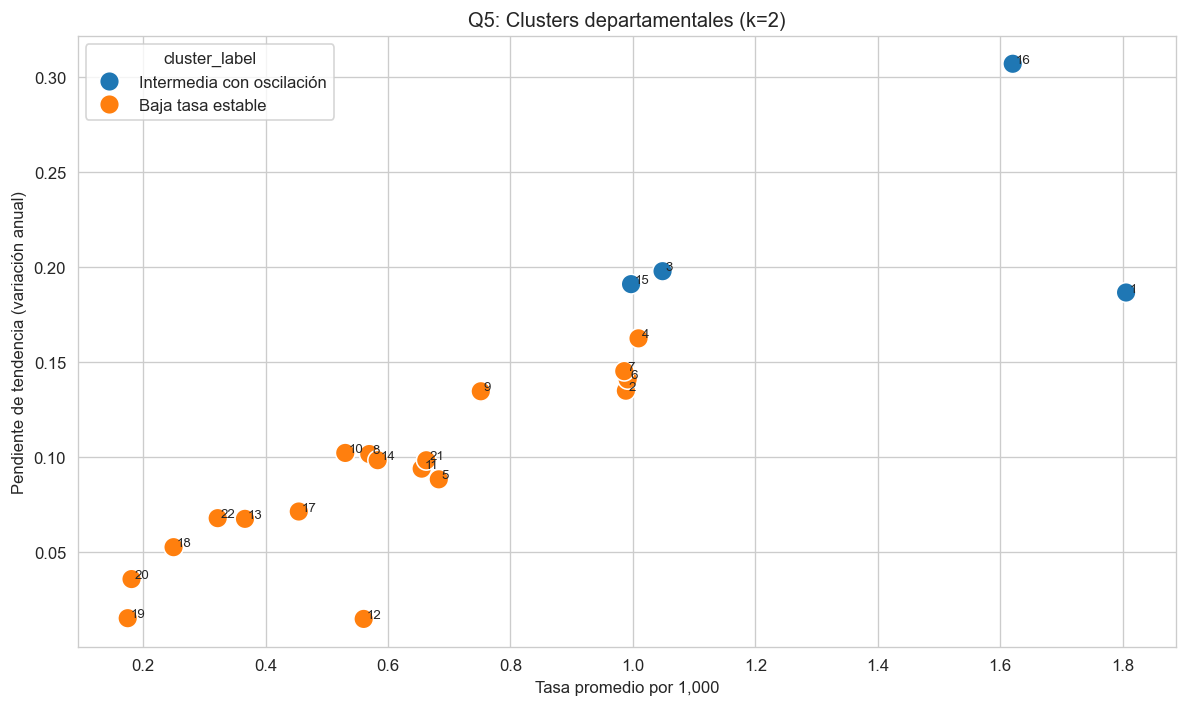

In [9]:
# Q5: Construcción de características y clustering departamental
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

panel_departamental = q2_dep_anual.copy() if "q2_dep_anual" in globals() else preparar_panel_departamental(nacimientos_clean, defunciones_clean)

features_rows: list[dict[str, float]] = []
for dep, grupo in panel_departamental.groupby("depreg"):
    grupo = grupo.sort_values("año")
    tasas = grupo["tasa_mortalidad_infantil_x1000"].to_numpy(dtype=float)
    años = grupo["año"].to_numpy(dtype=float)
    mask_valid = ~np.isnan(tasas)
    if mask_valid.sum() < 2:
        continue

    tasas_valid = tasas[mask_valid]
    años_valid = años[mask_valid]
    nacimientos_dep = grupo["nacimientos"].to_numpy(dtype=float)
    defunciones_dep = grupo["defunciones_infantiles"].to_numpy(dtype=float)

    slope, intercept = np.polyfit(años_valid, tasas_valid, 1)
    pred = slope * años_valid + intercept
    ss_res = float(np.sum((tasas_valid - pred) ** 2))
    ss_tot = float(np.sum((tasas_valid - np.nanmean(tasas_valid)) ** 2))
    r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 0.0

    features_rows.append({
        "depreg": dep,
        "dep_label": f"{int(dep):02d} - {DEPREG_TO_NOMBRE.get(dep, 'Desconocido')}",
        "media_tasa": float(np.nanmean(tasas_valid)),
        "std_tasa": float(np.nanstd(tasas_valid, ddof=0)),
        "max_tasa": float(np.nanmax(tasas_valid)),
        "min_tasa": float(np.nanmin(tasas_valid)),
        "tasa_ultima": float(tasas_valid[-1]),
        "pendiente_tendencia": float(slope),
        "r2_tendencia": float(r2),
        "nacimientos_promedio": float(np.nanmean(nacimientos_dep)),
        "defunciones_promedio": float(np.nanmean(defunciones_dep)),
    })

dept_features = pd.DataFrame(features_rows).dropna()
if dept_features.empty:
    raise RuntimeError("No fue posible construir características suficientes para el clustering de Q5.")

feature_cols = [
    "media_tasa",
    "std_tasa",
    "max_tasa",
    "tasa_ultima",
    "pendiente_tendencia",
    "nacimientos_promedio",
    "defunciones_promedio",
    "r2_tendencia",
 ]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dept_features[feature_cols])

silhouette_rows = []
labels_por_k: dict[int, np.ndarray] = {}
for k in range(2, 6):
    modelo = KMeans(n_clusters=k, n_init=25, random_state=42)
    etiquetas = modelo.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, etiquetas)
    silhouette_rows.append({"k": k, "silhouette": score})
    labels_por_k[k] = etiquetas

silhouette_df = pd.DataFrame(silhouette_rows)
silhouette_df.to_csv(OUTPUT_TABLES / "q5_silhouette_scores.csv", index=False)
display(silhouette_df)

best_k = int(silhouette_df.sort_values("silhouette", ascending=False).iloc[0]["k"])
dept_features["cluster"] = labels_por_k[best_k]
dept_features.to_csv(OUTPUT_TABLES / "q5_clusters_departamentos.csv", index=False)

cluster_summary = (
    dept_features.groupby("cluster").agg(
        departamentos=("dep_label", "count"),
        media_tasa=("media_tasa", "mean"),
        tasa_ultima=("tasa_ultima", "mean"),
        pendiente_tendencia=("pendiente_tendencia", "mean"),
        std_tasa=("std_tasa", "mean")
    )
    .reset_index()
)
cluster_summary = cluster_summary.sort_values("media_tasa")
alias_base = [
    "Baja tasa estable",
    "Intermedia con oscilación",
    "Alta tasa creciente",
    "Muy alta y volátil",
    "Extrema mixta"
]
cluster_summary["cluster_label"] = [alias_base[i % len(alias_base)] for i in range(len(cluster_summary))]
label_map = dict(zip(cluster_summary["cluster"], cluster_summary["cluster_label"]))
dept_features["cluster_label"] = dept_features["cluster"].map(label_map)
cluster_summary.to_csv(OUTPUT_TABLES / "q5_cluster_summary.csv", index=False)
display(cluster_summary)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dept_features,
    x="media_tasa",
    y="pendiente_tendencia",
    hue="cluster_label",
    palette="tab10",
    s=140
)
for _, row in dept_features.iterrows():
    plt.text(row["media_tasa"] + 0.005, row["pendiente_tendencia"] + 0.0005, str(int(row["depreg"])), fontsize=8)
plt.title(f"Q5: Clusters departamentales (k={best_k})")
plt.xlabel("Tasa promedio por 1,000")
plt.ylabel("Pendiente de tendencia (variación anual)")
plt.tight_layout()
plt.savefig(OUTPUT_FIGURES / "q5_dispersion_clusters.png", dpi=300)
plt.show()

### Cierre Q5

- **Archivos generados:** `q5_silhouette_scores.csv`, `q5_clusters_departamentos.csv`, `q5_cluster_summary.csv` y `q5_dispersion_clusters.png`.
- **Interpretación sugerida:** combinar `cluster_label` con `media_tasa` y `pendiente_tendencia` para bautizar cada grupo dentro del documento final (p.ej. “Departamentos con tasa baja y estable”).
- **Validaciones pendientes:** contrastar clusters con variables contextuales externas (pobreza, cobertura de salud) para fortalecer la narrativa del informe.